In [1]:
from prevelop import preparation, exploration, clustering, evaluation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

__Data Preparation and Preprocessing__

In [3]:
file = '/Users/kaspar/Documents/FIR/Prevelop/data/Simus/csvfolding-2025-03-19_13-23-25.csv'

In [4]:
### load cad-data
cad_data, num_columns_cad, cat_columns_cad = preparation.load_simus_data(file)

In [5]:
cad_data.head()

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3443-693-A-V10-CAM,609.48,22.2,6.0,6.0,6.0,0.0,22.2,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-070-PFA-CAM,5871.83,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-071-PFA-CAM,7590.52,94.5,14.0,14.0,14.0,0.0,94.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-078-PFA-CAM,5925.80,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-081-V10-CAM,9216.14,159.5,14.0,14.0,14.0,0.0,159.5,0.0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# load the data
process_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/Römheld_prozess_2.xlsx')
link_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_teile_zeichnungen_3.xlsx')

In [7]:
process_data

,Teil,POSITIONS_NR,BELEGUNGSEINHEIT_NR,RUESTZEIT,ZEIT_JE_EINHEIT,VORLAUFZEIT
0,3440122,10.0,99130.0,0.100,0.00,1.00
1,3443693A,10.0,63101.0,10.000,0.50,0.00
2,3443693A,20.0,65801.0,55.000,3.00,0.03
3,3443693A,30.0,63712.0,5.000,0.01,0.51
4,3443693A,40.0,63501.0,15.000,3.00,0.84
...,...,...,...,...,...,...
18418,728150021,20.0,63205.0,25.000,3.00,2.29
18419,728150021,30.0,63503.0,45.000,15.20,2.41
18420,728150021,40.0,63203.0,1.000,0.01,2.50
18421,728150021,50.0,99999.0,0.001,0.00,0.00


In [8]:
# aggreagate process data
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]
process_data, num_columns_process, cat_columns_process  = preparation.aggregate_data(process_data, 'Teil', ['BELEGUNGSEINHEIT_NR','RUESTZEIT','VORLAUFZEIT'],['encode','mean','mean'])

In [9]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = num_columns_cad + num_columns_process
cat_columns = cat_columns_cad + cat_columns_process
data, data_preprocessed = preparation.prepare_data(cad_data, num_columns, cat_columns, process_data=process_data, link_data=link_data)

In [10]:
data_preprocessed

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 25578.0,BELEGUNGSEINHEIT_NR 6000.0,BELEGUNGSEINHEIT_NR 201457.0,BELEGUNGSEINHEIT_NR nan,BELEGUNGSEINHEIT_NR nan,BELEGUNGSEINHEIT_NR 96501.0,BELEGUNGSEINHEIT_NR 64506.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 67580.0,BELEGUNGSEINHEIT_NR 63101.0
Teil,,,,,,,,,,,,,,,,,,,,,
3443693A,0.000092,0.010546,0.026087,0.026087,0.026087,0.0,0.010546,0.0,0.1,0.133333,...,0,0,0,0,0,1,0,0,0,1
3500081,0.001385,0.075772,0.060870,0.060870,0.060870,0.0,0.075772,0.0,0.6,0.200000,...,0,0,0,0,0,1,0,1,0,0
35001018,0.001989,0.056770,0.069565,0.069565,0.069565,0.0,0.056770,0.0,0.5,0.133333,...,0,0,0,0,0,1,0,1,0,0
35001048,0.000998,0.042280,0.069565,0.069565,0.069565,0.0,0.042280,0.0,1.0,0.266667,...,0,0,0,0,0,1,0,1,0,0
35001105,0.006987,0.106413,0.108696,0.108696,0.108696,0.0,0.106413,0.0,0.7,0.266667,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716697256,0.018546,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1
716697257,0.020936,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1
716697258,0.019147,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,0.9,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1


__Exploration__

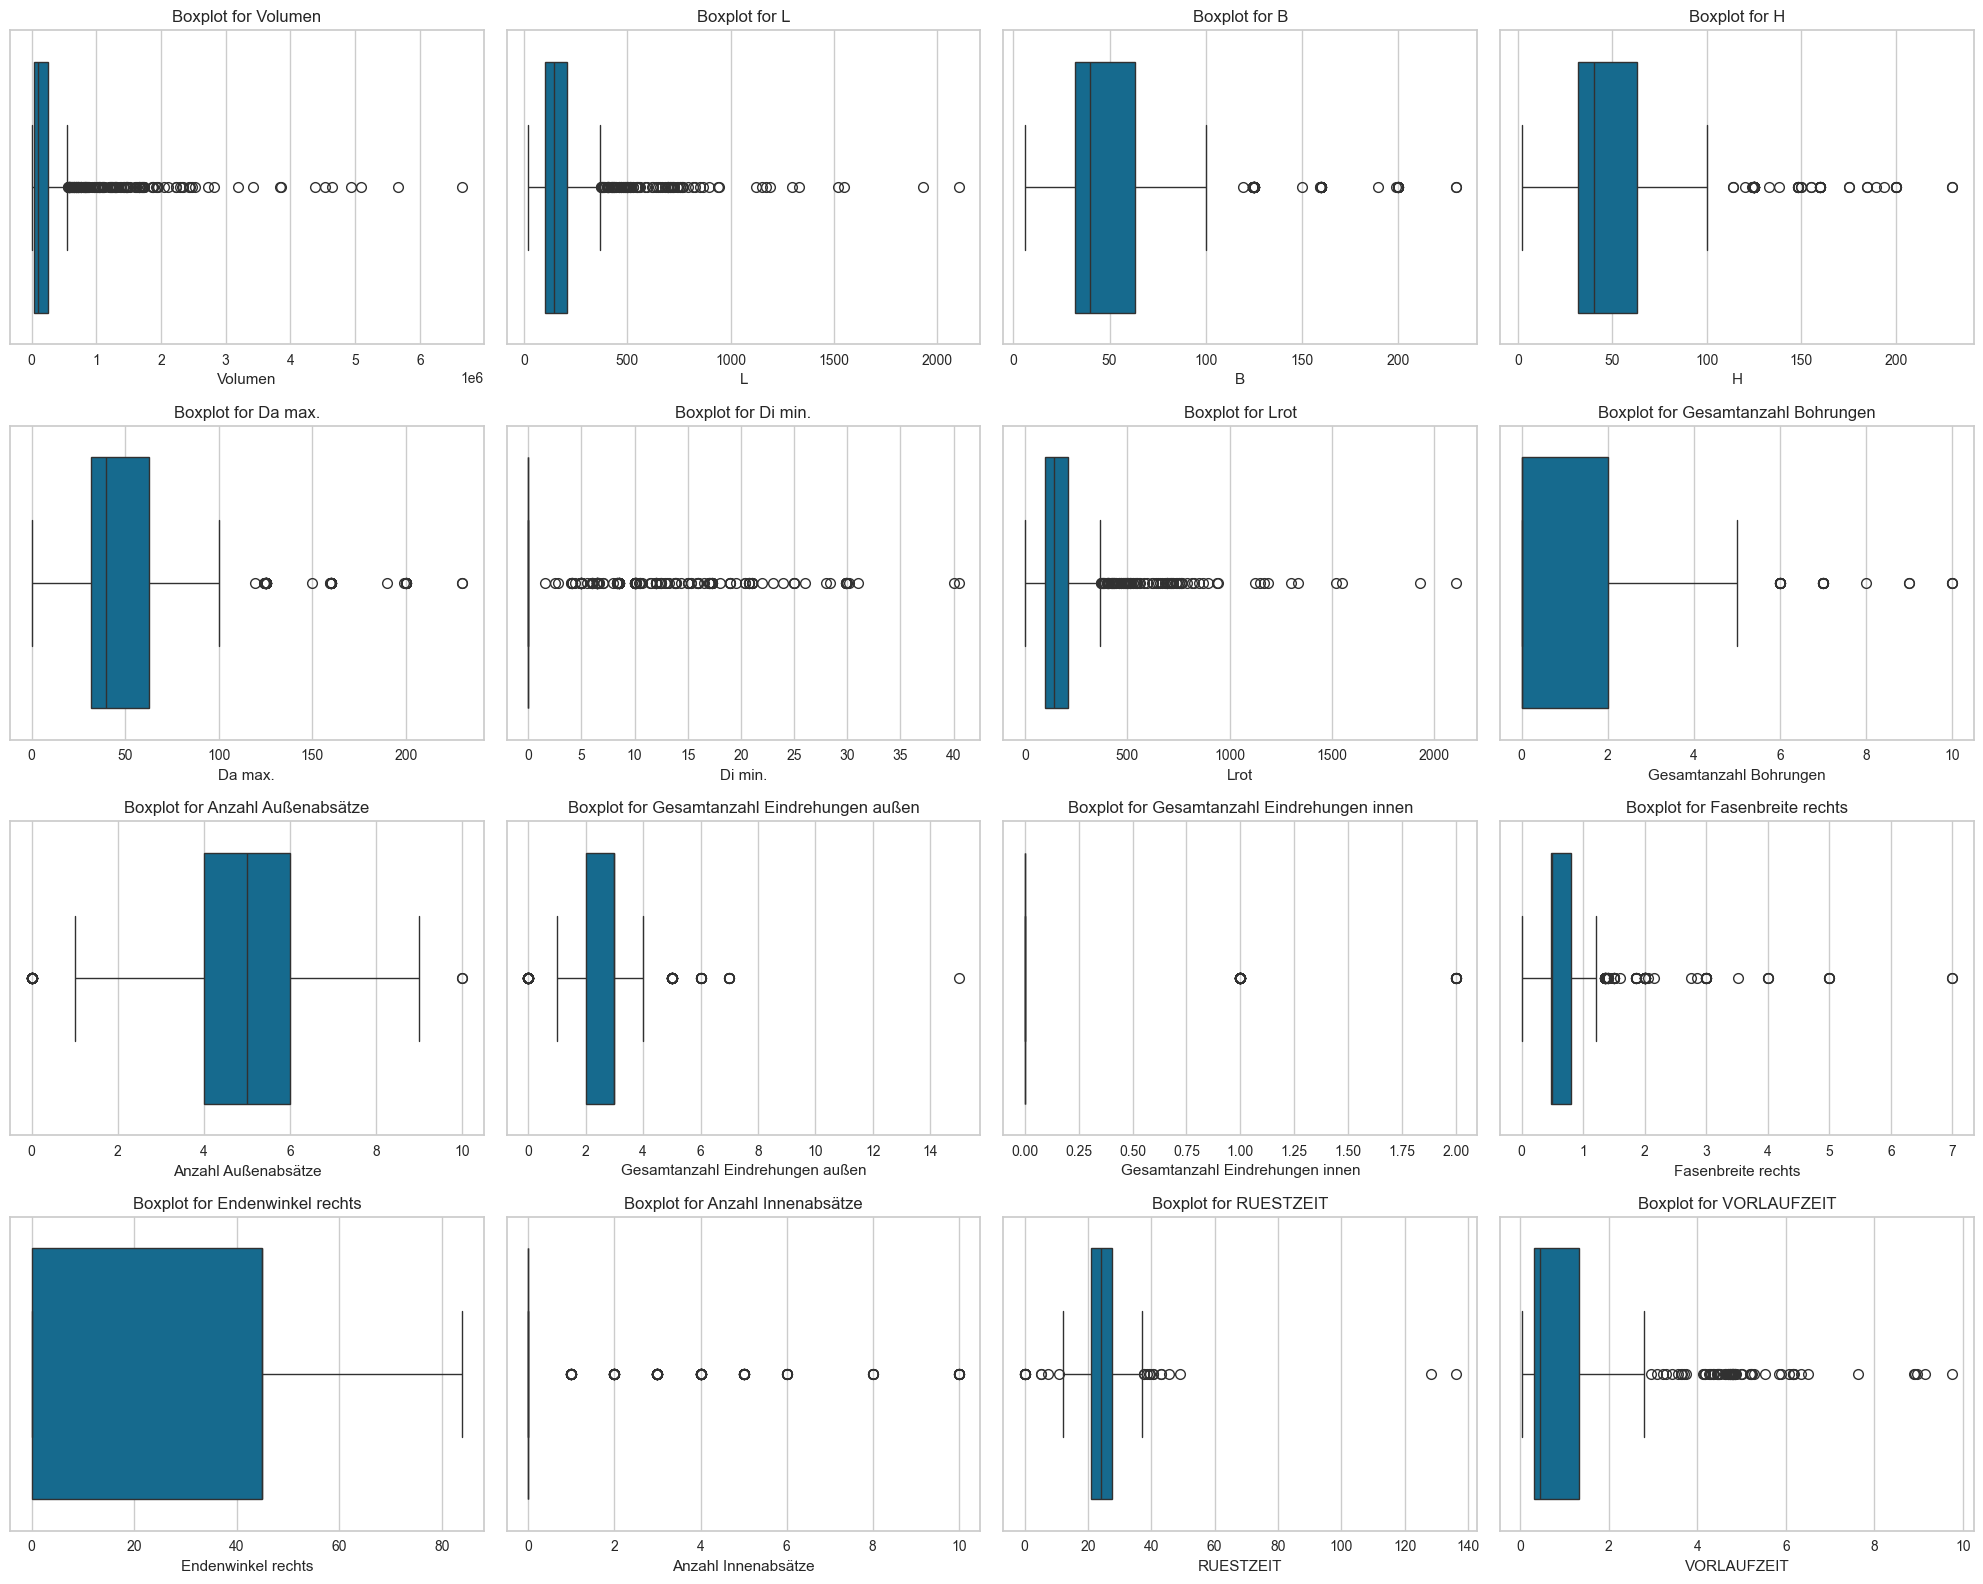

In [11]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

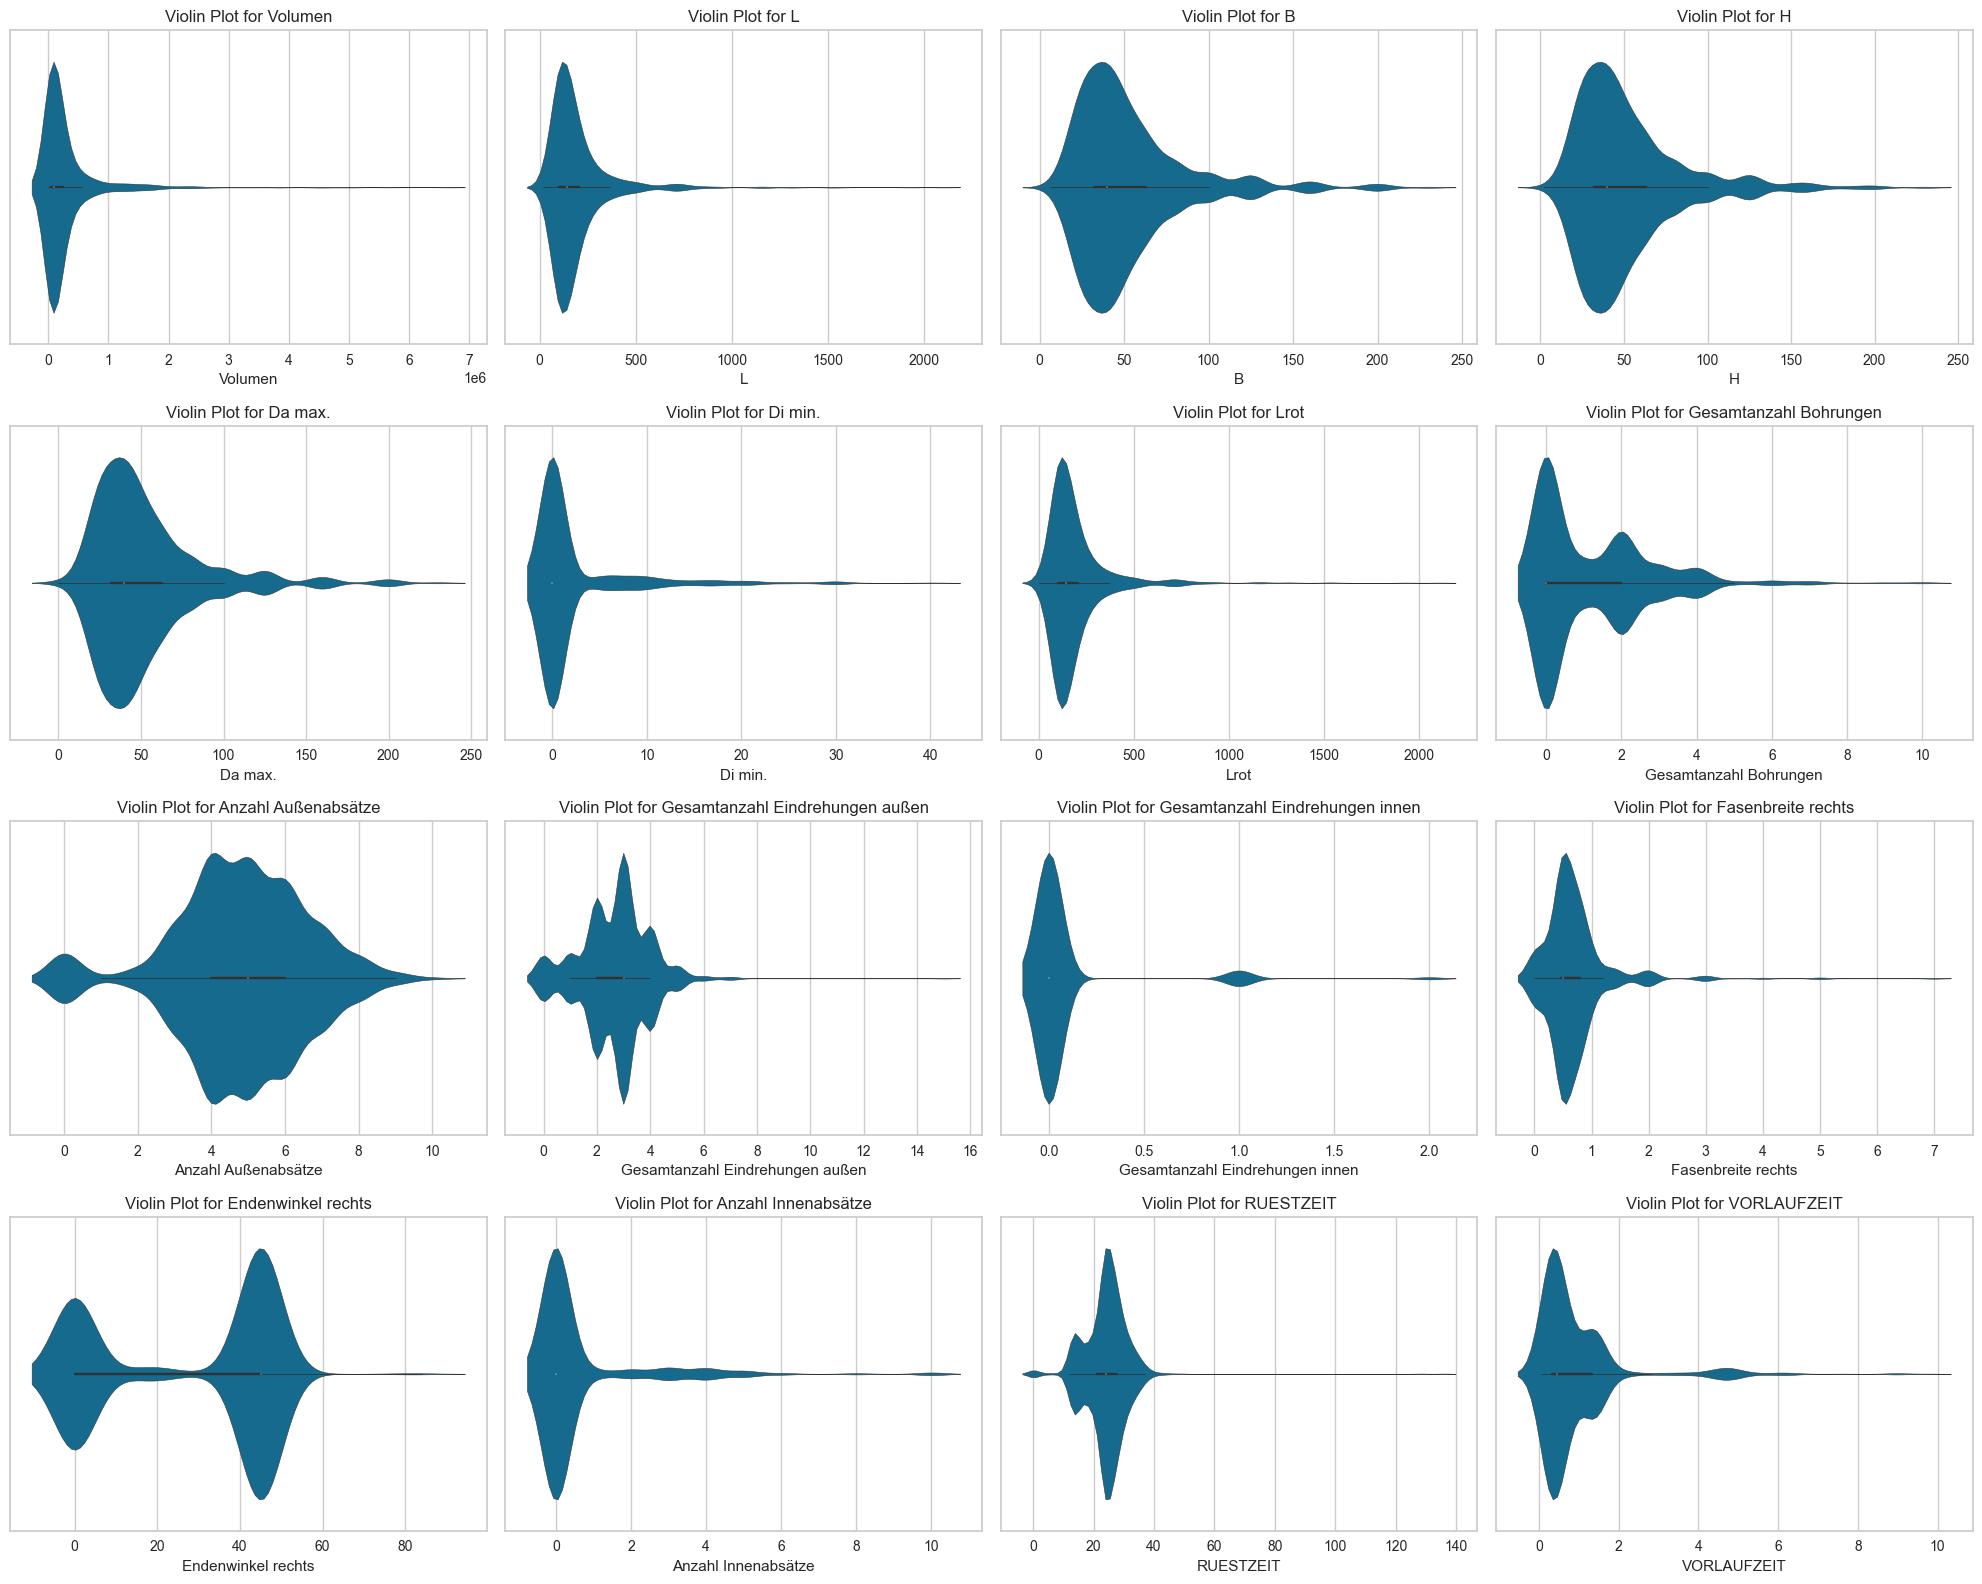

In [12]:
# show violonplot of data
exploration.violinplots(data, num_columns)

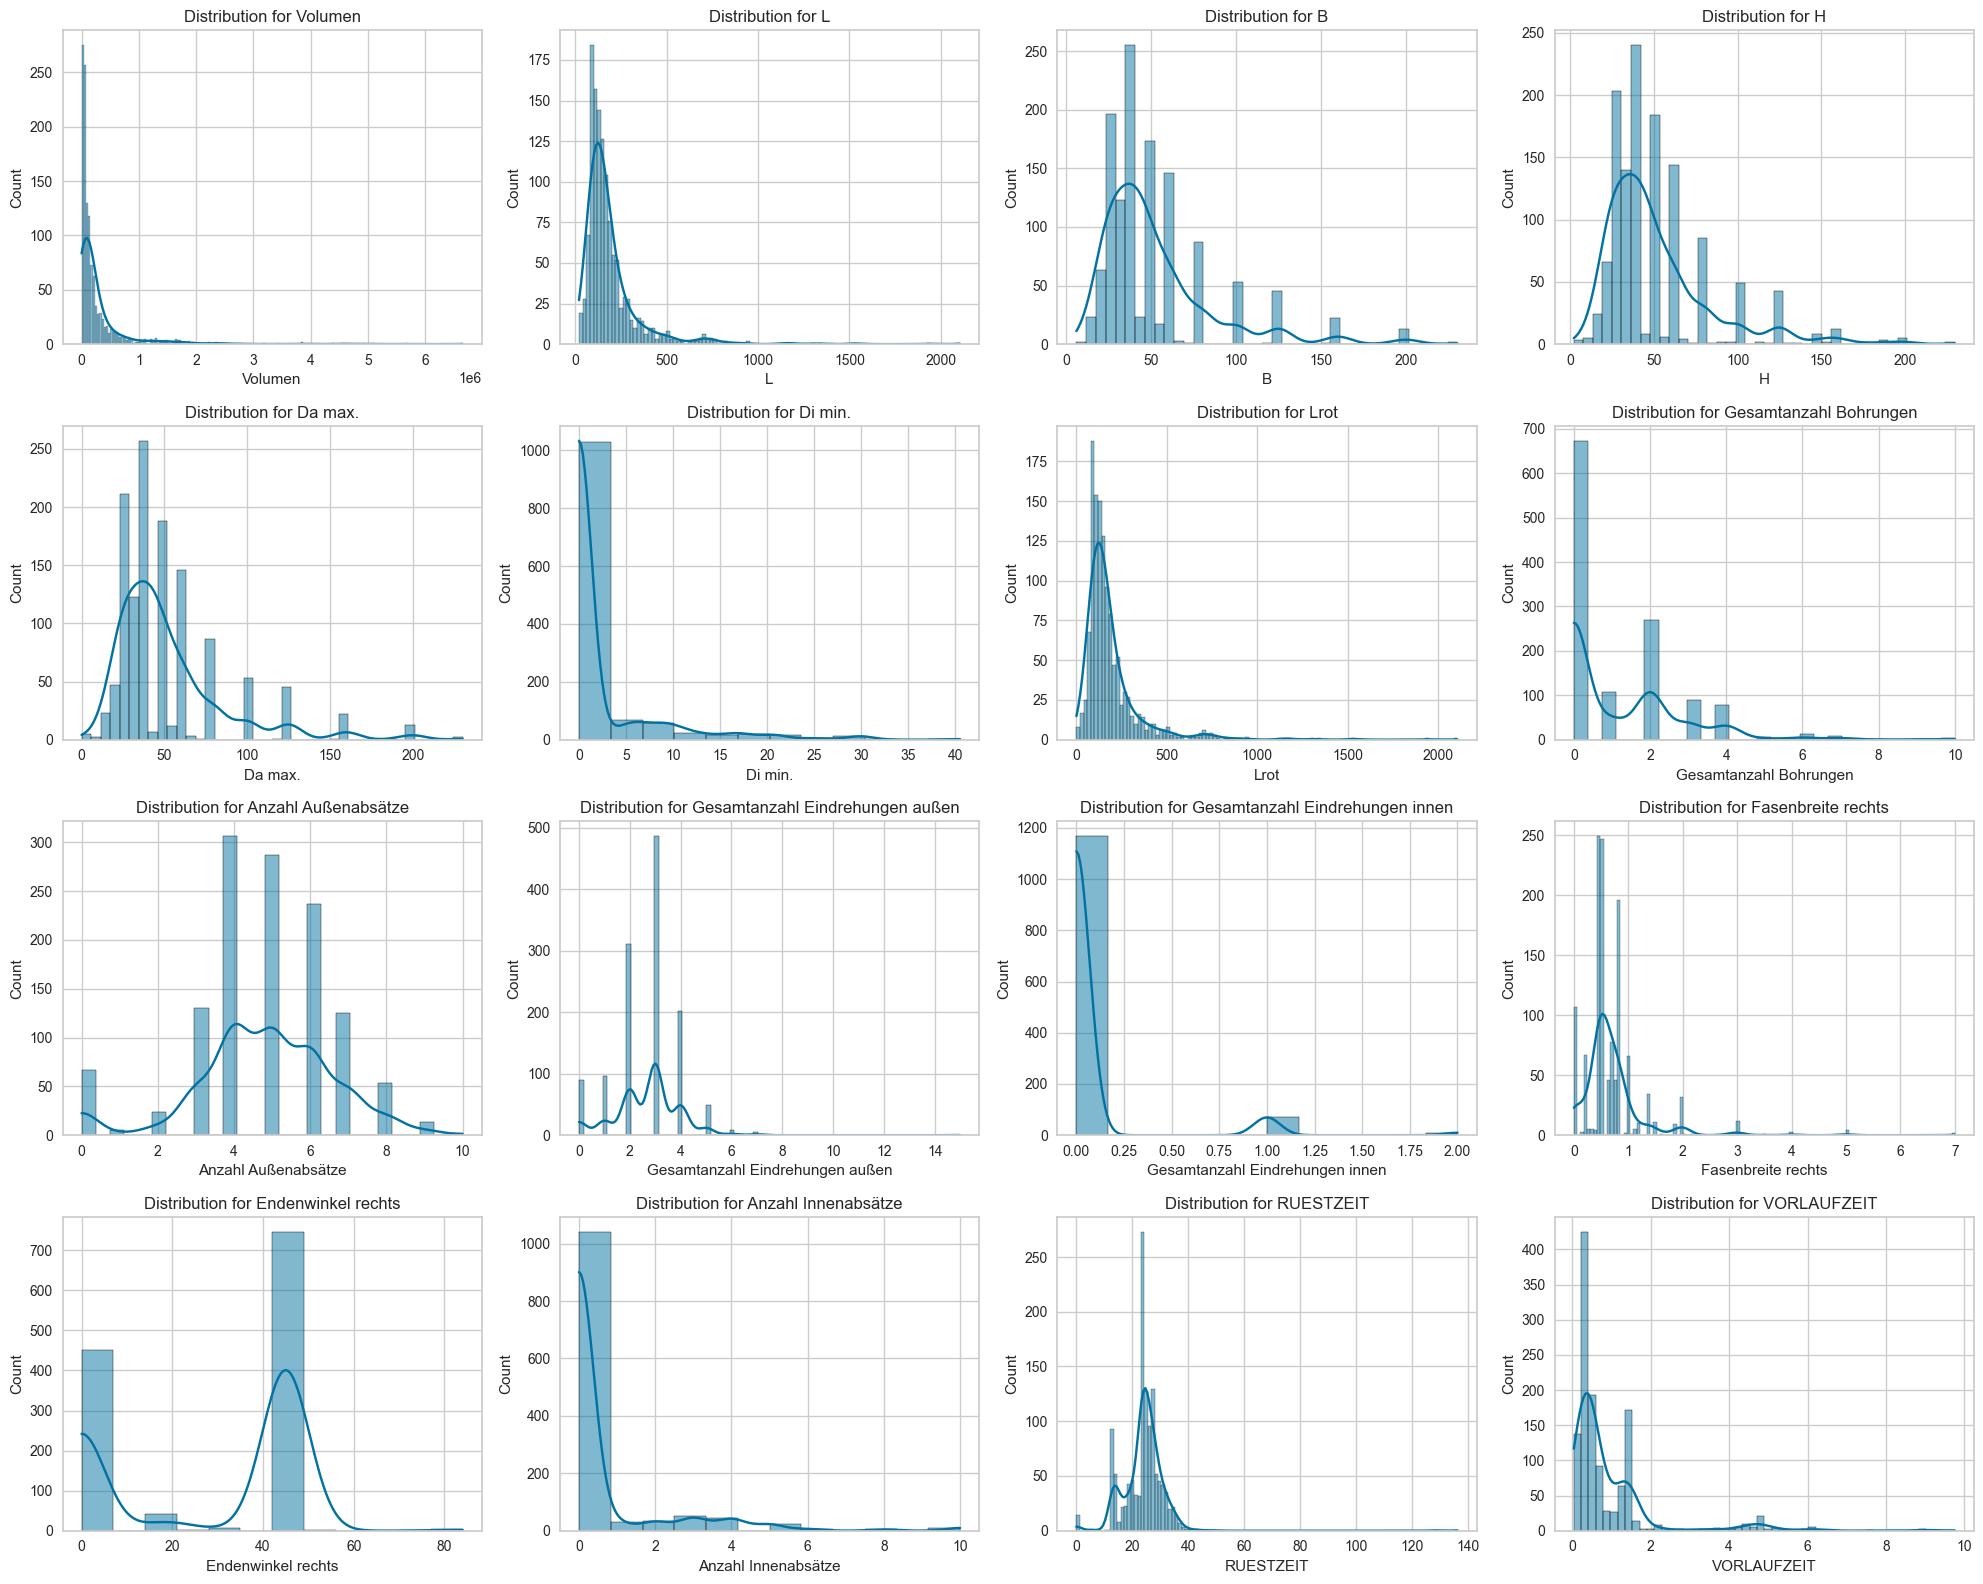

In [13]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [14]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

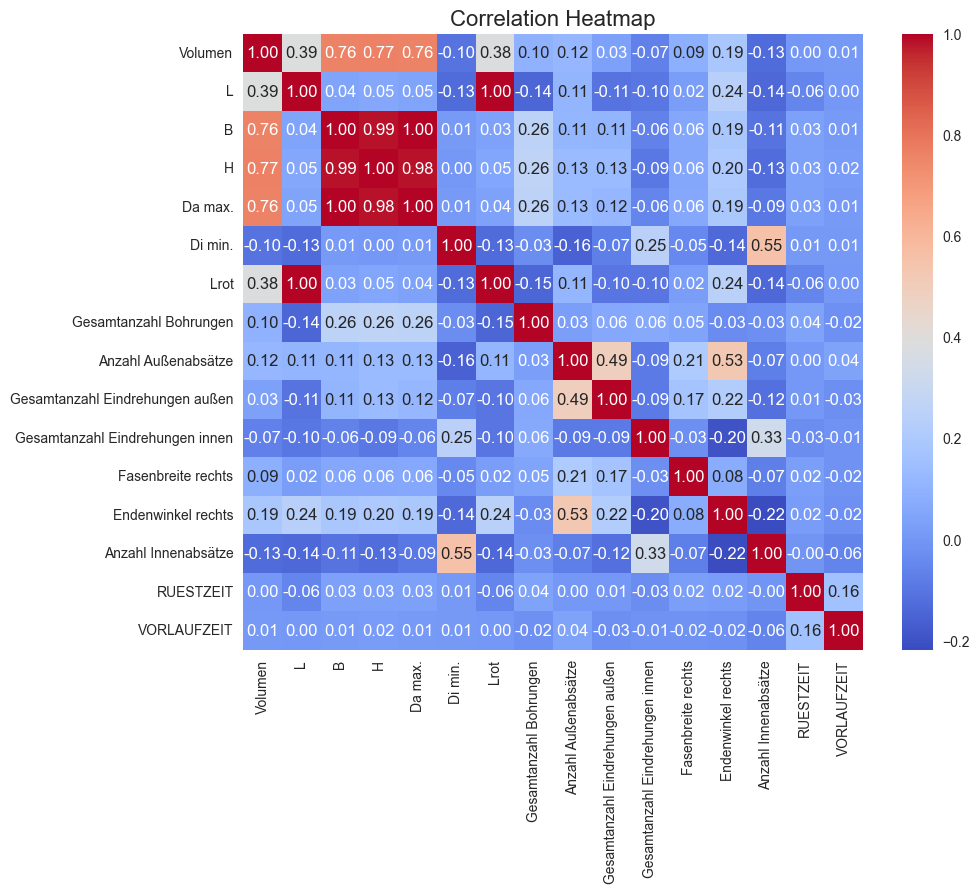

In [15]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [16]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 25578.0,BELEGUNGSEINHEIT_NR 6000.0,BELEGUNGSEINHEIT_NR 201457.0,BELEGUNGSEINHEIT_NR 96501.0,BELEGUNGSEINHEIT_NR 64506.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 67580.0,BELEGUNGSEINHEIT_NR 63101.0,RUESTZEIT,VORLAUFZEIT
Teil,,,,,,,,,,,,,,,,,,,,,
3443693A,609.48,22.2,6.0,6.0,6.0,0.0,22.2,0.0,1.0,2.0,...,0,0,0,1,0,0,0,1,19.583333,4.862500
35011172,41289.97,203.5,25.0,25.0,25.0,0.0,203.5,0.0,6.0,4.0,...,0,0,0,1,0,1,0,0,26.777778,9.757778
35011277,39653.56,253.5,25.0,25.0,25.0,0.0,253.5,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,25.888889,4.812222
35011477,87665.41,265.0,32.0,32.0,32.0,0.0,265.0,0.0,4.0,3.0,...,0,0,0,1,0,1,0,0,21.333333,0.316667
35011545,44304.34,147.0,25.0,25.0,25.0,0.0,147.0,0.0,6.0,3.0,...,0,0,0,1,0,1,0,0,27.600000,1.338000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716697255,115444.45,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,23.785714,1.386429
716697256,123396.76,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,26.333333,0.483333
716697257,139295.27,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,13.200000,0.220000


In [17]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

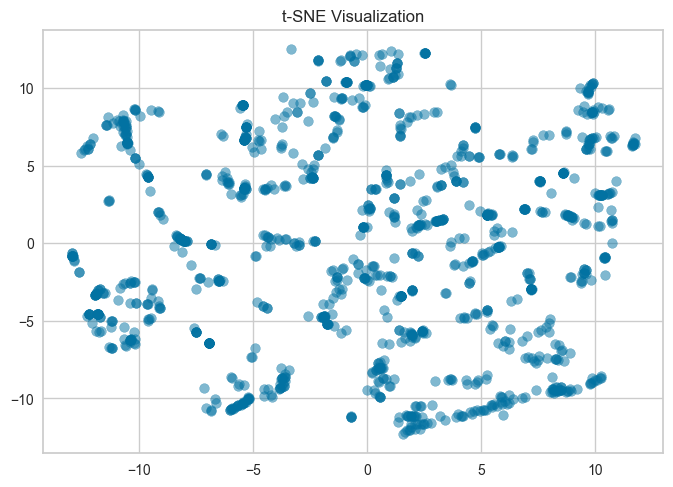

In [ ]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Adjustments based on EDA__

In [ ]:
# remove colums LRot H and Da max
data = data.drop(columns=['Lrot','H','Da max.'])
data_preprocessed = data_preprocessed.drop(columns=['Lrot','H','Da max.'])

__Clustering__

In [ ]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

In [ ]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 100, 202)

AttributeError: module 'prevelop.clustering' has no attribute 'elbow_plot_agglomerative'

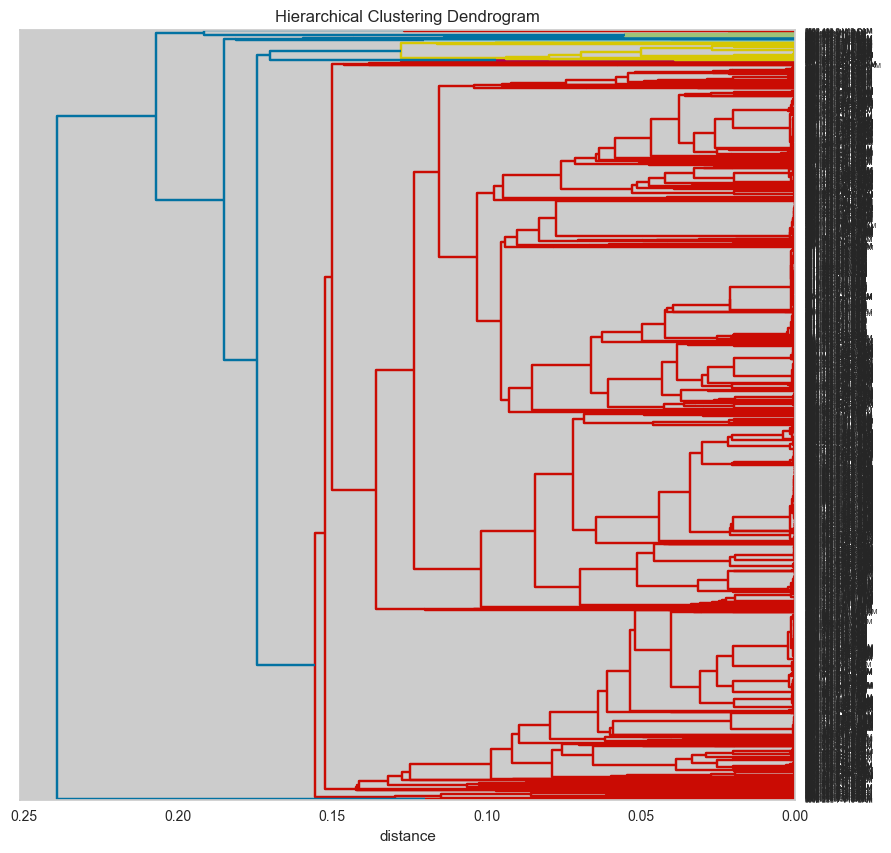

In [ ]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

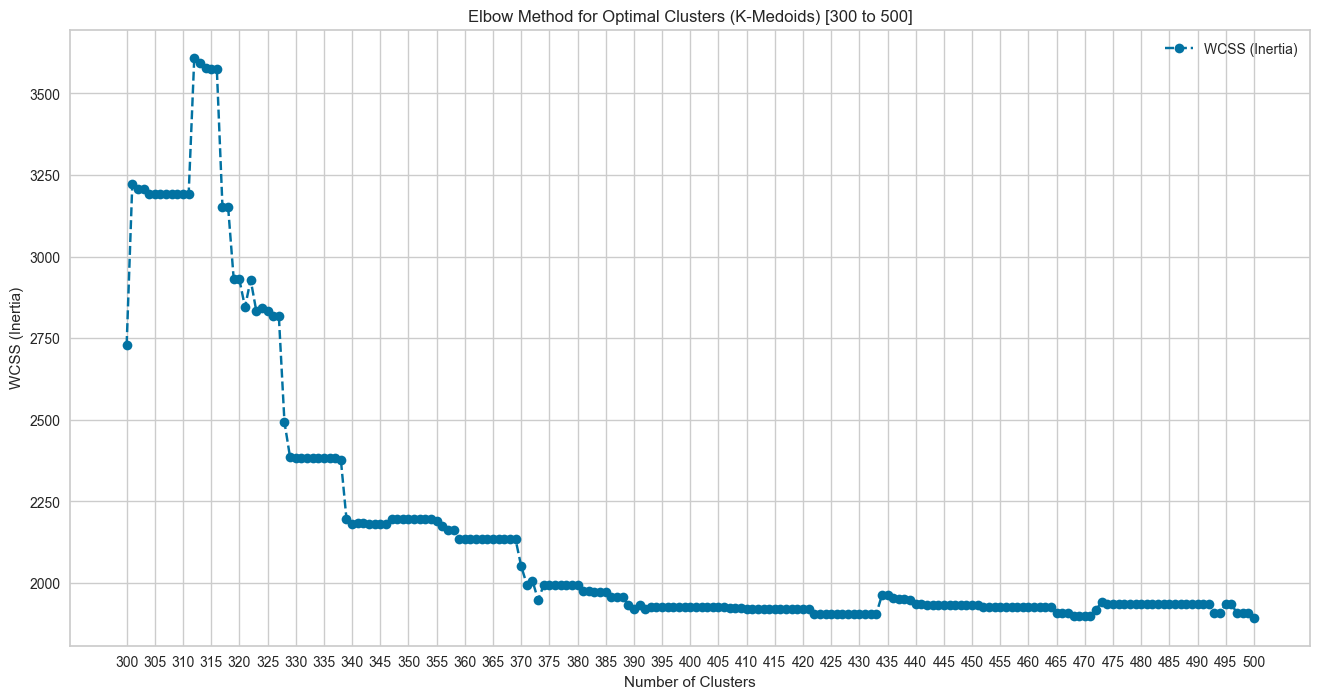

In [ ]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 300, 500)

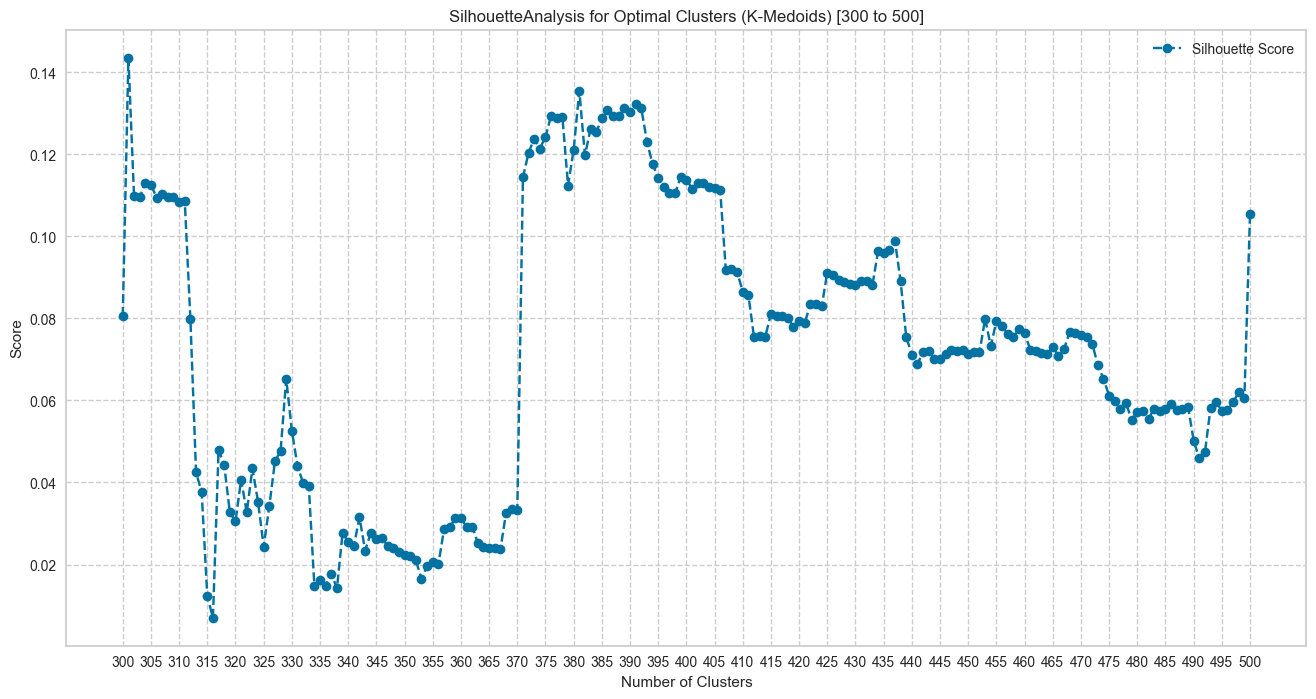

In [ ]:
clustering.silhouette_score_kmedoids(data_preprocessed, 300, 500)

__Evaluation__

In [ ]:
labels = clustering.agglomerative_clustering(distance_matrix, 33)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_aggl_66.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.014441483874011,
 'ch-score': 60.872757075140214,
 'dunn-index': 0.6070728726994514,
 'silhouette-score': 0.23790911596086636}

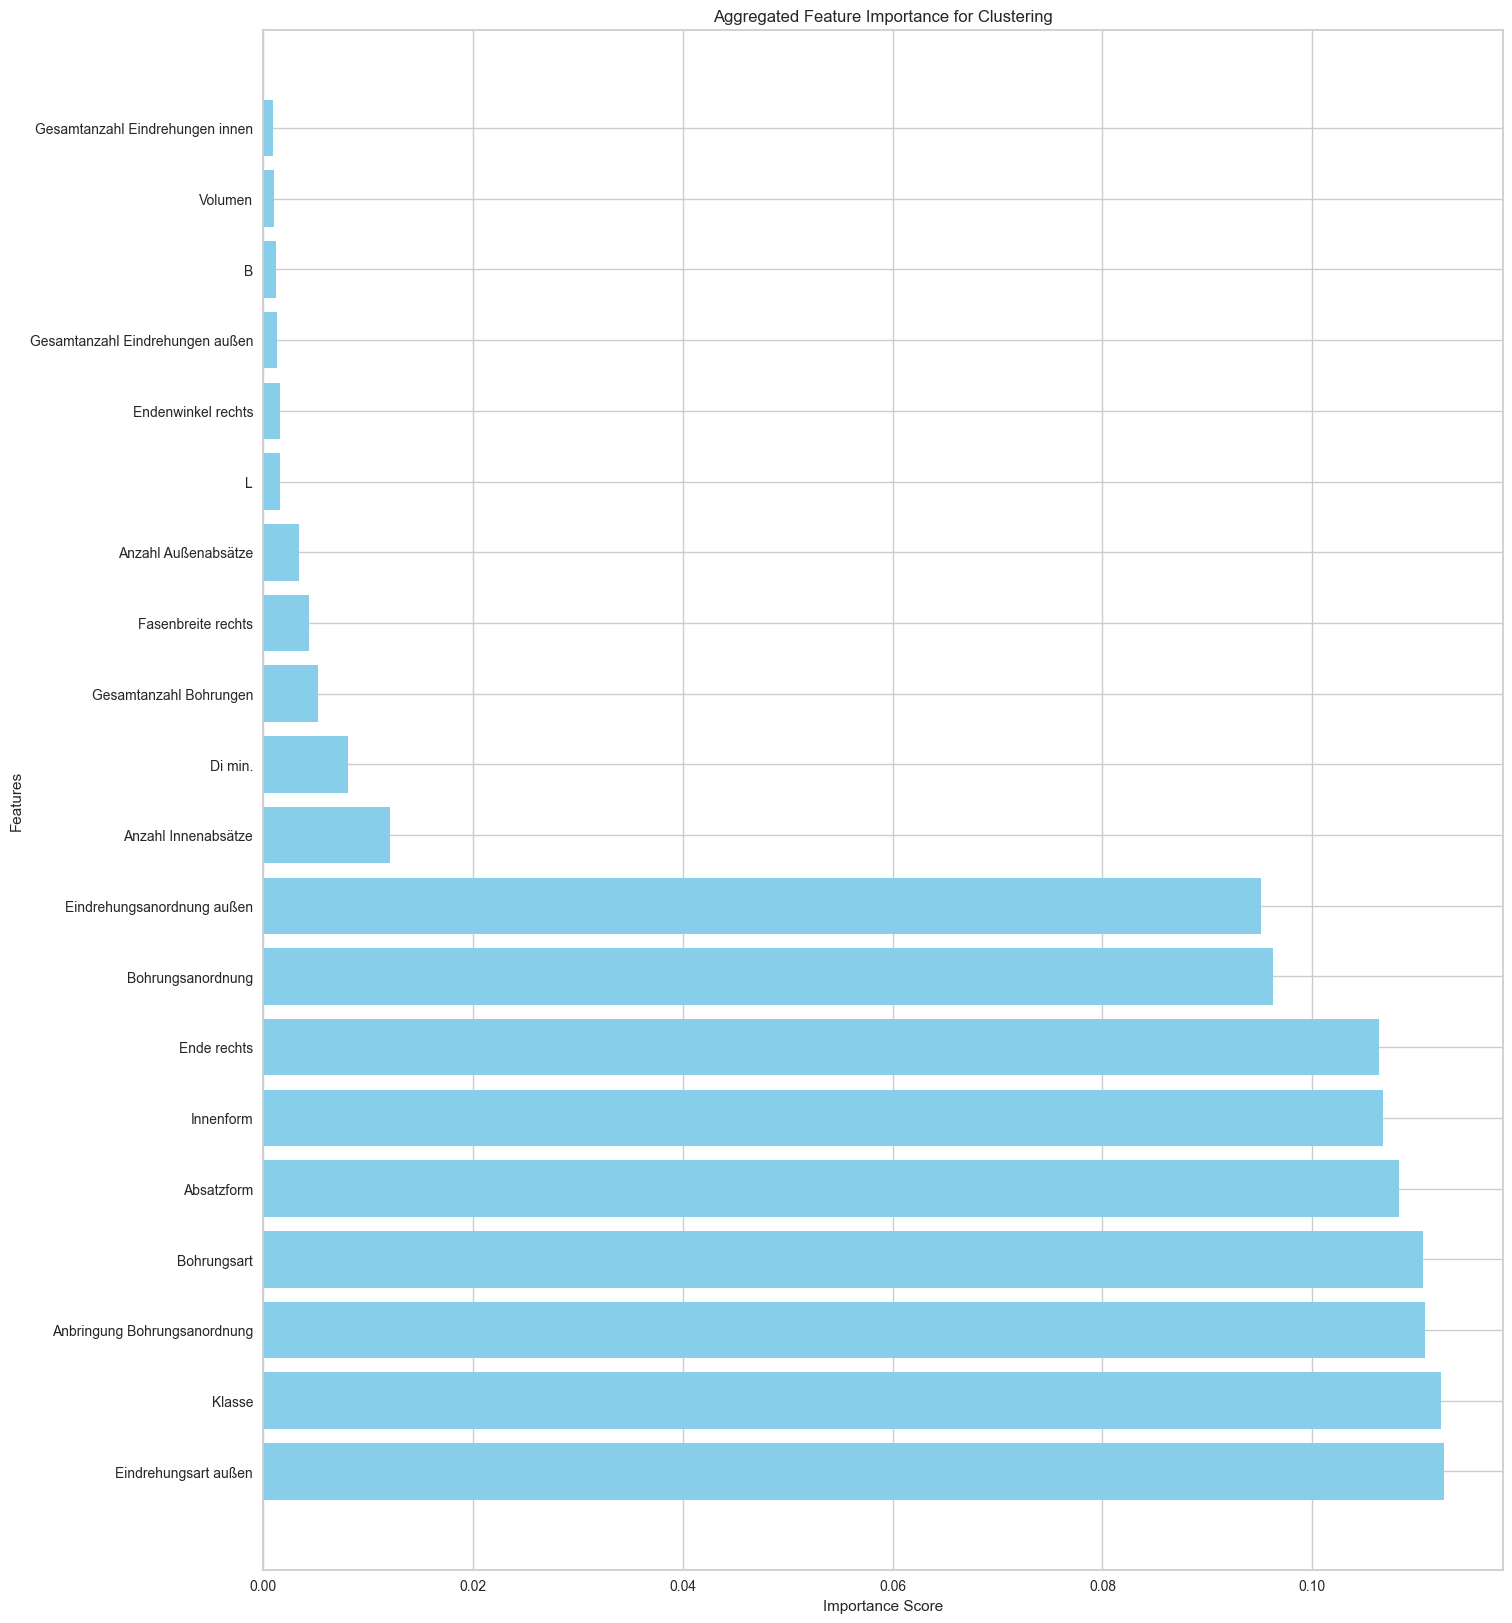

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

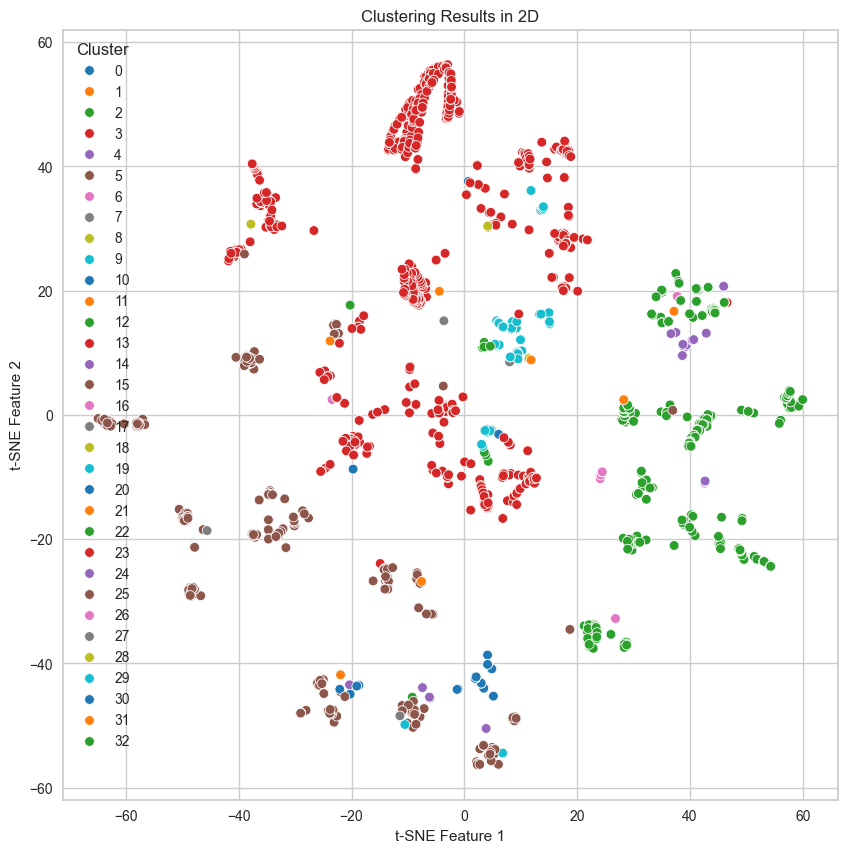

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
labels = clustering.kmedoids_clustering(distance_matrix, 50)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('results/results_roemheld_kmedoids_50.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 2.6154407132077835,
 'ch-score': 129.55127662274955,
 'dunn-index': 0.029228243927639334,
 'silhouette-score': 0.2034241651740714}

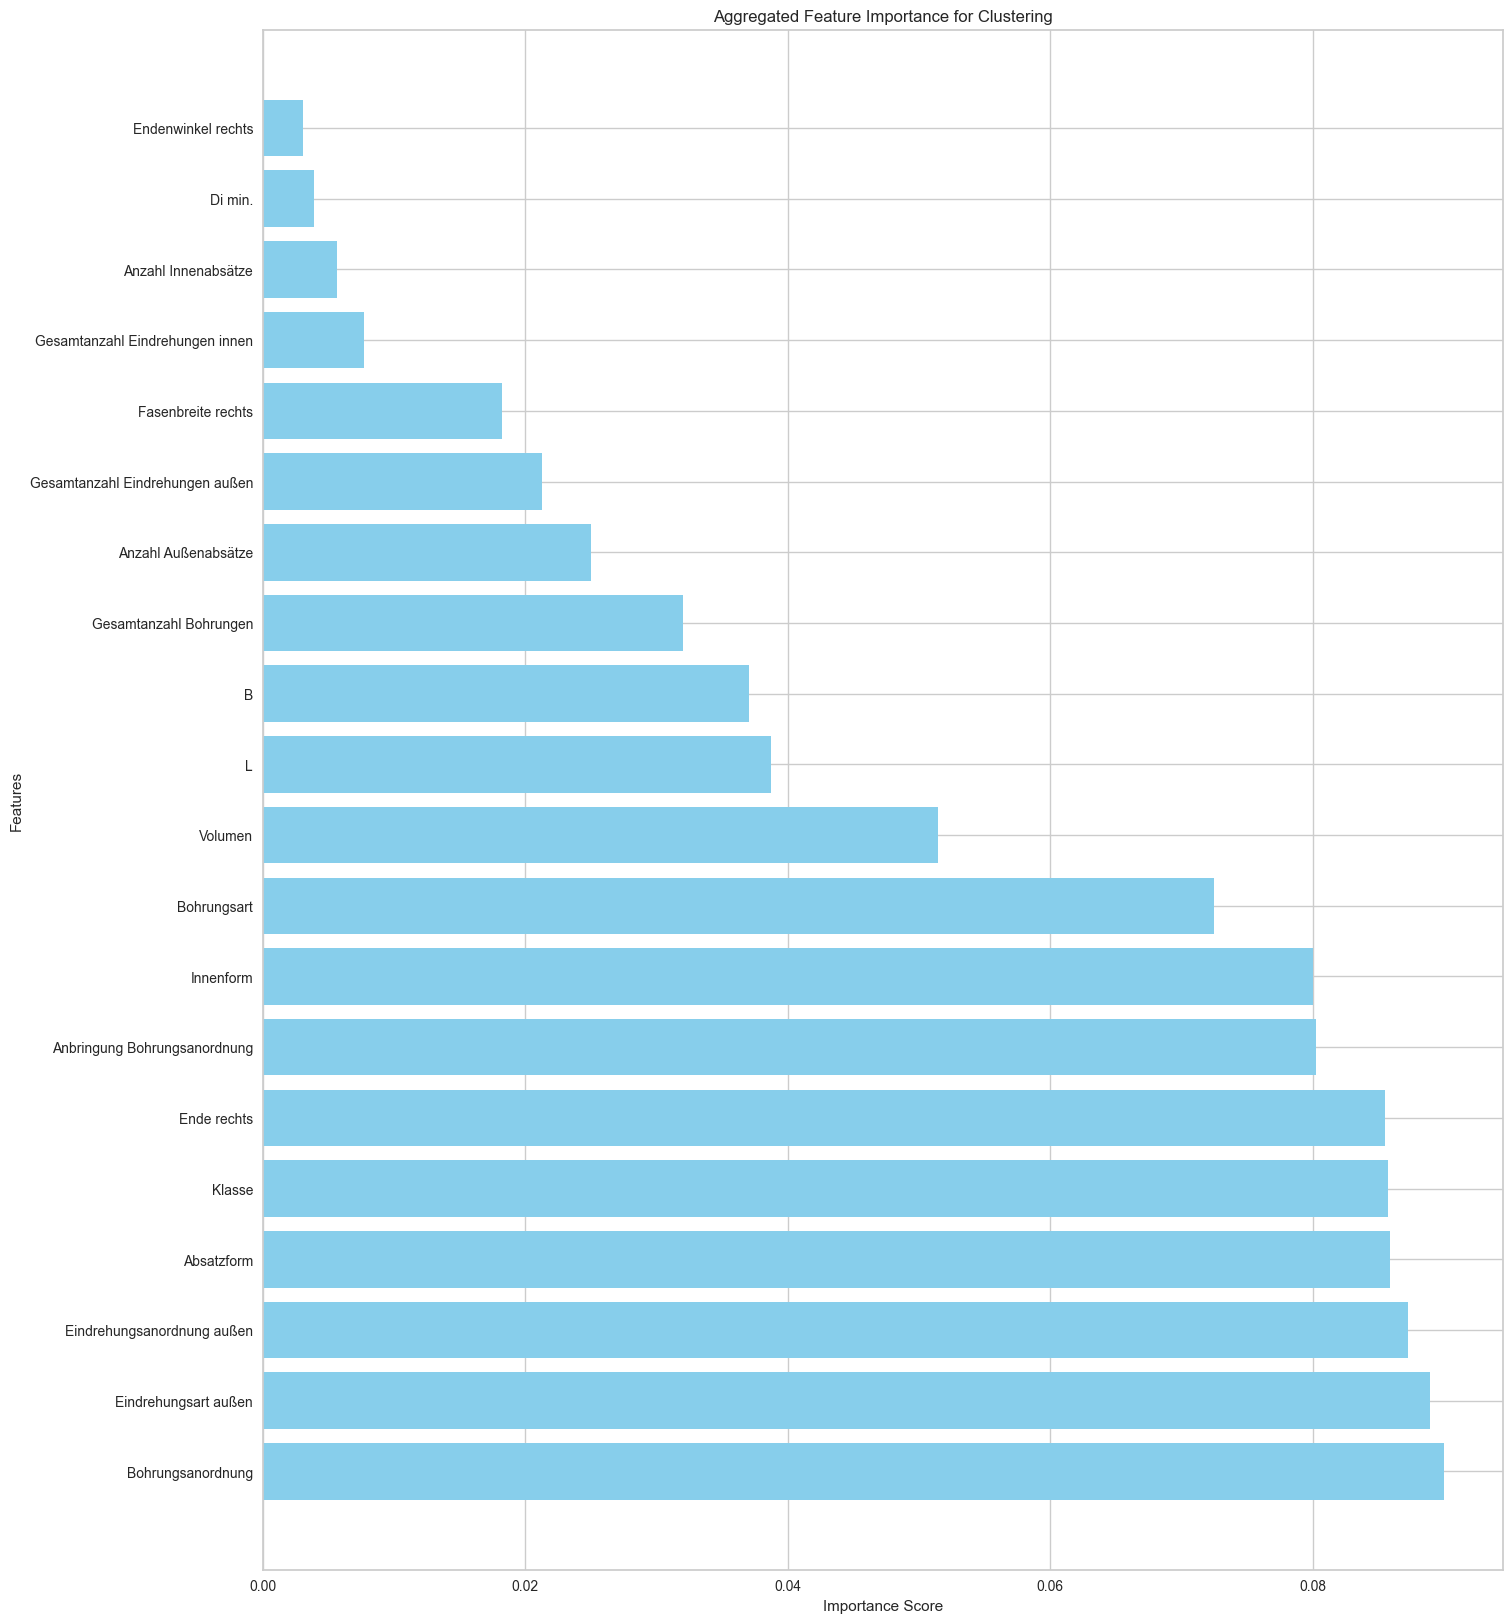

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

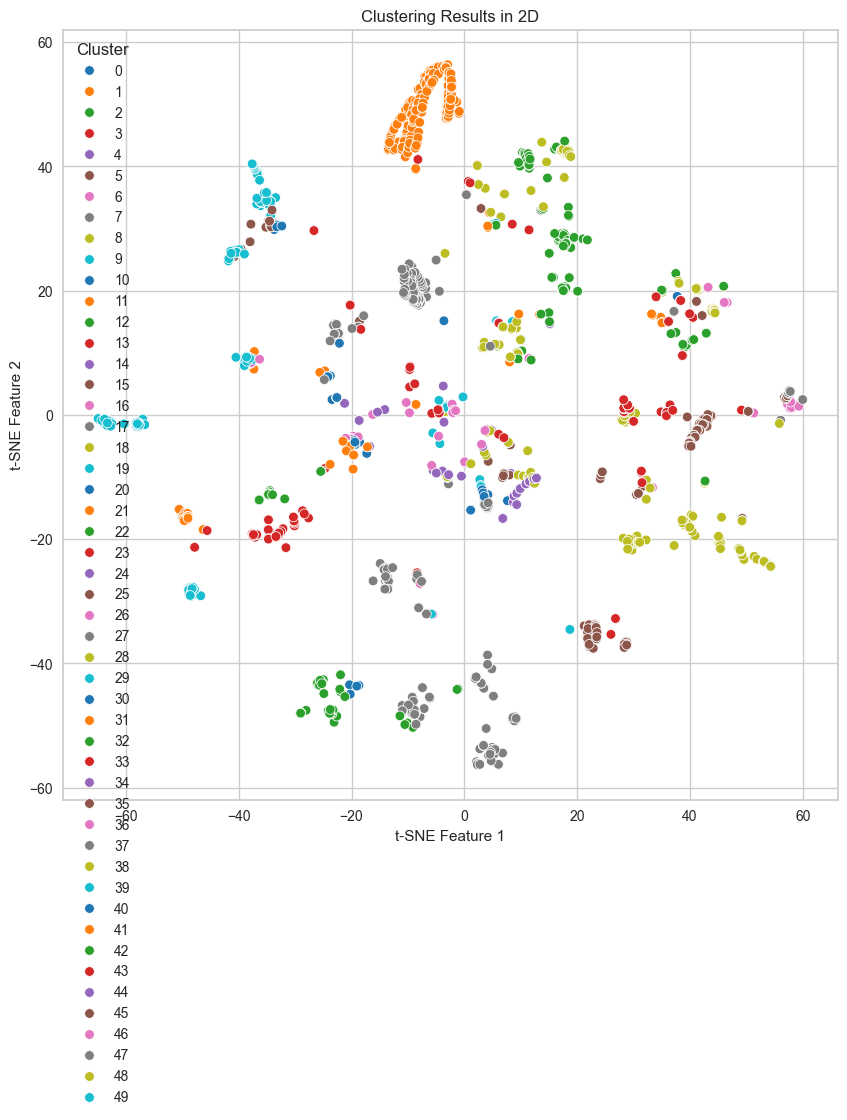

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)